# Titanic Data Set from Kaggle

This project works with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic).

The project focuses on predicting if a passenger is survived or deceased.


___
## Import Libraries

In [1]:
import numpy as np
import pandas as pd 

# Import the packages to plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

___
## The Data

Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test = pd.read_csv('test.csv')

In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


___
## Visualaze the data

Text(0.5,1,"Number of passengers that survived (1) and that didn't (0)")

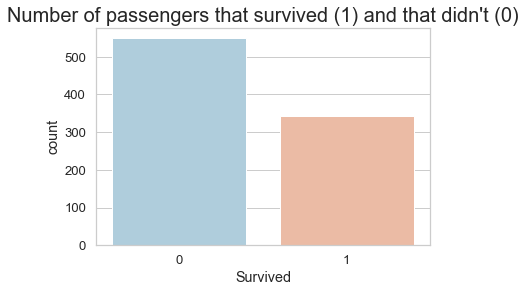

In [6]:
sns.set(font_scale=1.2)
sns.set_style('whitegrid')
ax = sns.countplot(x='Survived',data=train,palette='RdBu_r')
ax.set_title('Number of passengers that survived (1) and that didn\'t (0)',size=20)

Text(0.5,1,"Number of passengers that survived (1) and that didn't (0) grouped by their sex")

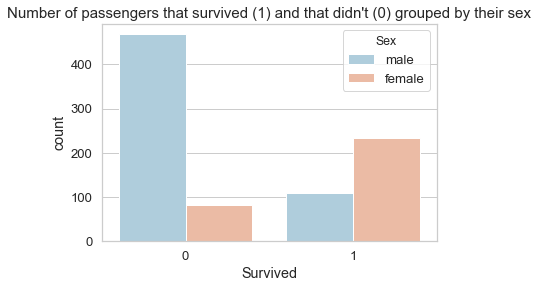

In [7]:
sns.set_style('whitegrid')
ax = sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')
ax.set_title('Number of passengers that survived (1) and that didn\'t (0) grouped by their sex',size=15)

Text(0.5,1,"Number of passengers that survived (1) and that didn't (0) grouped by their class")

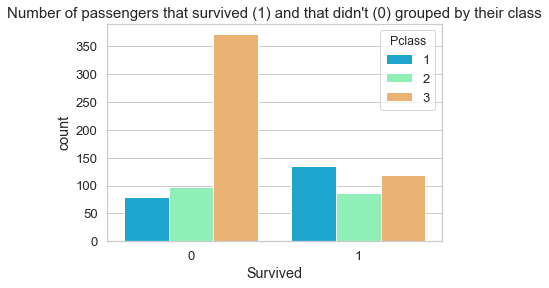

In [8]:
sns.set_style('whitegrid')
ax = sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')
ax.set_title('Number of passengers that survived (1) and that didn\'t (0) grouped by their class',size=15)

Text(0.5,1,"Histogram representing the age of both passengers that survived and that didn't")

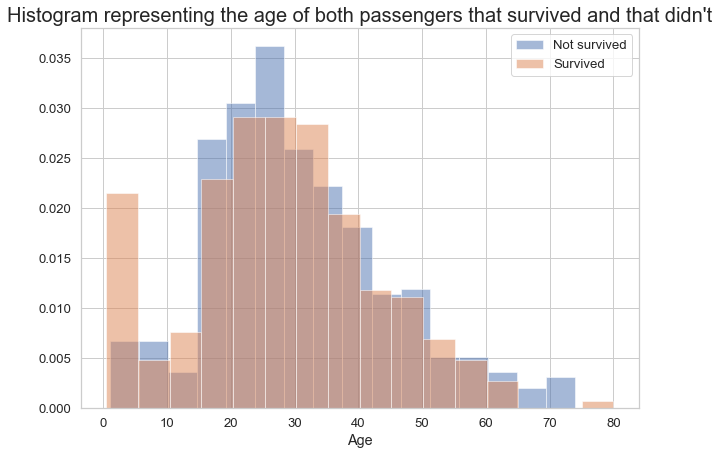

In [9]:
# then if the age contributes in any way with the chance of survival
Age = train.dropna(subset = ["Age"])
plt.figure(figsize=(10,7))
plt.hist(Age[Age['Survived']==0]['Age'],label='Not survived', alpha=0.5,bins=16,density=True)
plt.hist(Age[Age['Survived']==1]['Age'],label='Survived',alpha=0.5,bins=16,density=True)
plt.legend()
plt.xlabel('Age')
plt.title('Histogram representing the age of both passengers that survived and that didn\'t',size=20)

Text(0.5,1,'number of siblings and spouses on board')

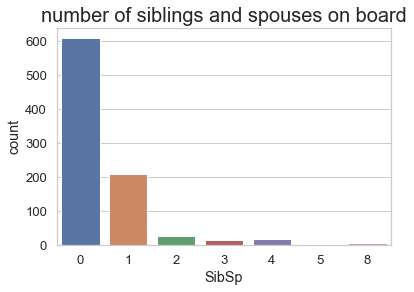

In [10]:
ax = sns.countplot(x='SibSp',data=train)
ax.set_title('number of siblings and spouses on board',size=20)

Text(0.5,1,'number of parents and children on board')

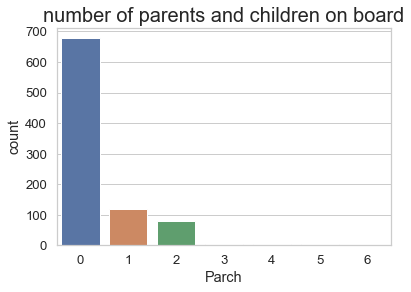

In [11]:
ax = sns.countplot(x='Parch',data=train)
ax.set_title('number of parents and children on board',size=20)

Text(0.5,0,'fare')

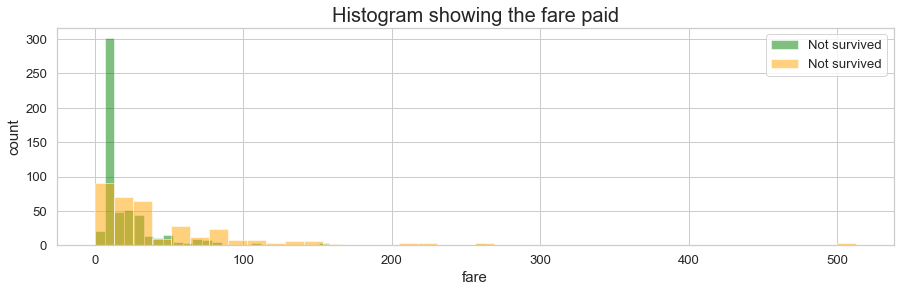

In [12]:
train[train['Survived']==0]['Fare'].hist(color='green',label='Not survived',alpha=0.5,bins=40,figsize=(15,4))
train[train['Survived']==1]['Fare'].hist(color='orange',label='Not survived',alpha=0.5,bins=40)
plt.title('Histogram showing the fare paid', size=20)
plt.legend()
plt.ylabel('count',size=15)
plt.xlabel('fare',size=15)


### Cufflinks for plots

 Let's visualize this better using cufflinks.

In [13]:
import cufflinks as cf
cf.go_offline()

In [14]:
train['Fare'].iplot(kind='hist',bins=30,color='green')

___
## Exploratory Data Analysis

To begin with, let's check the missing data.

### Missing

We can use seaborn to create a simple heatmap to see where we are missing data.

Text(0.5,1,'Missing Data in the Training Data Set')

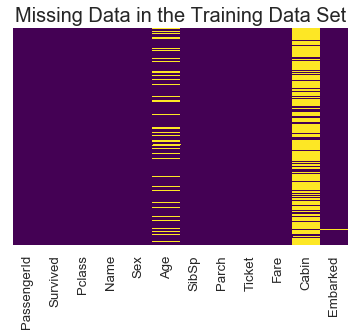

In [15]:
sns.set(font_scale=1.2)
ax = sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
ax.set_title('Missing Data in the Training Data Set',size=20)

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Roughly 20 per cent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. 
The Cabin column is missing around 80% of the data. We can drop this column, change it to another feature like "Cabin Known: 1 or 0" or consider the missing data as a category itself.
Finally, there are still two passengers that we don't know where they embarked from.

Text(0.5,1,'Missing Data in the Testing Data Set')

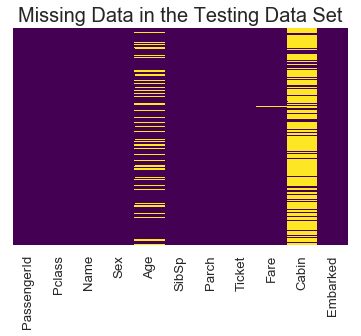

In [17]:
ax = sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')
ax.set_title('Missing Data in the Testing Data Set',size=20)

In [18]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Similarly, roughly 20 per cent of the Age data and around 80% of the Cabin data are missing.
Finally, there are one passenger whose ticket fare is unknown.

### Filling the missing data

We want to fill in missing age data. To simplify this process we merge together training and testing data remembering that the first 891 passangers are part of thetrainig set. To do this we remove the Survived column from the training data set.

In [19]:
X = train.drop('Survived',axis=1)
X = pd.concat([X,test])
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


### Age column
One way to do sort out this column is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and consider more data to determin the missing passenger age.

Text(0.5,1,'Boxplot representing the average age when the passengers are grouped according to their class')

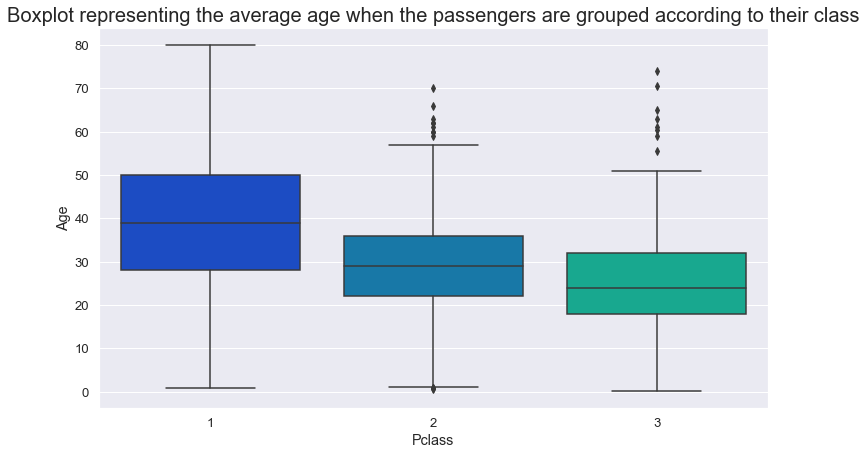

In [20]:
# check if the age is related to the class
plt.figure(figsize=(12, 7))
ax = sns.boxplot(x='Pclass',y='Age',data=X,palette='winter')
ax.set_title('Boxplot representing the average age when the passengers are grouped according to their class',size=20)

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [21]:
print('the average age on people in first class is: '+ str(round(X[X['Pclass']==1]['Age'].mean())))
print('the average age on people in second class is: '+ str(round(X[X['Pclass']==2]['Age'].mean())))
print('the average age on people in third class is: '+ str(round(X[X['Pclass']==3]['Age'].mean())))

the average age on people in first class is: 39
the average age on people in second class is: 30
the average age on people in third class is: 25


In [22]:
#create the function to assign the missing age
def inpute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 39

        elif Pclass == 2:
            return 30

        else:
            return 25

    else:
        return Age

In [23]:
# apply the function
X['Age'] = X[['Age','Pclass']].apply(inpute_age,axis=1)

Let's check the missing data.

Text(0.5,1,'Missing Data')

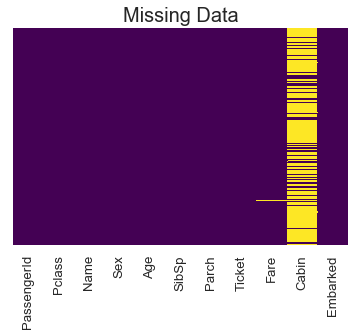

In [24]:
ax = sns.heatmap(X.isnull(),yticklabels=False,cbar=False,cmap='viridis')
ax.set_title('Missing Data',size=20)

### Cabin column

In [25]:
X['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
413     NaN
414    C105
415     NaN
416     NaN
417     NaN
Name: Cabin, Length: 1309, dtype: object

The cabin is caracterised by a letter and a number, let's consider the letter only.

In [26]:
# consider only the letters of the cabins
X['Cabin'] = X['Cabin'].str[0]

In [27]:
# create the function to substitute unknown cabins with the letter Z
def input_Cabin(col):
    
    if pd.isnull(col):
        return 'Z'
    else:
        return col

In [28]:
# we run the function so we can consider the unkown cabins as a category
X['Cabin']  = X['Cabin'].apply(input_Cabin)

In [29]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        1309 non-null   object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


### Embarked column
There are still two passengers that we don't know where they embarked from.

In [30]:
# checked if these passengers were alone or if they have any common features
X[X['Embarked'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B,NaN
829,830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B,NaN


Because both passengers traveled alone, we consider the number of people that embarked at each city

Text(0.5,1,'Number of passengers embarked at each city')

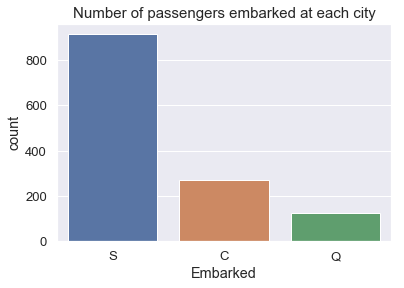

In [31]:
# check how many people embarked at the different cities
ax = sns.countplot(x='Embarked',data=X)
ax.set_title('Number of passengers embarked at each city',size=15)

Because most people embarked at Southampton, it is most likely that these two passengers embarked at Southampton as well.

In [32]:
# create the function
def input_Embarked(col):
    if pd.isnull(col):
        return 'S'
    else:
        return col

In [33]:
X['Embarked']  = X['Embarked'].apply(input_Embarked)

In [34]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        1309 non-null   object 
 10  Embarked     1309 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


### Fare column

To determin the missing information we consider the average fare paid in each class.

Text(0.5,1,'Boxplot representing the average ticket fare when the passengers are grouped according to their class')

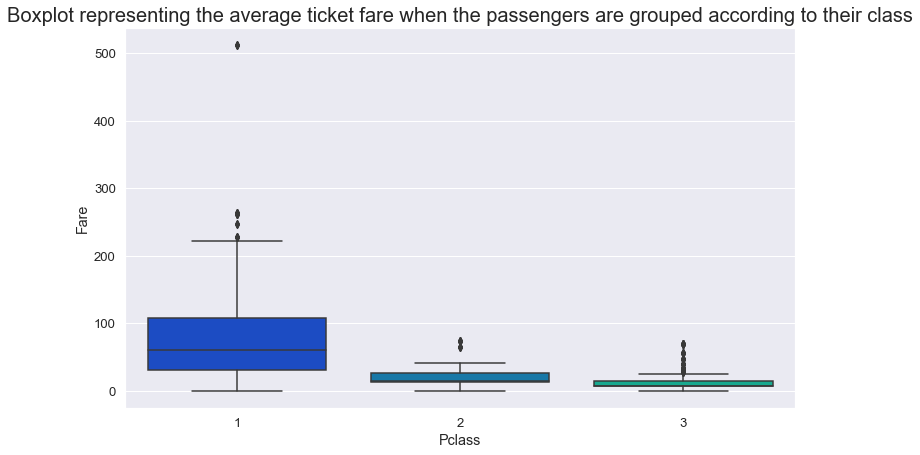

In [35]:
# check if the fare is related to the class
plt.figure(figsize=(12, 7))
ax = sns.boxplot(x='Pclass',y='Fare',data=X,palette='winter')
ax.set_title('Boxplot representing the average ticket fare when the passengers are grouped according to their class',size=20)

In [36]:
print('the average ticket fare for people in first class is: '+ str(round(X[X['Pclass']==1]['Fare'].mean())))
print('the average ticket fare for people in second class is: '+ str(round(X[X['Pclass']==2]['Fare'].mean())))
print('the average ticket fare for people in third class is: '+ str(round(X[X['Pclass']==3]['Fare'].mean())))

the average ticket fare for people in first class is: 88
the average ticket fare for people in second class is: 21
the average ticket fare for people in third class is: 13


In [37]:
#create the function to assign the missing fare
def inpute_fare(cols):
    Fare = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Fare):

        if Pclass == 1:
            return 88

        elif Pclass == 2:
            return 21

        else:
            return 13

    else:
        return Fare

In [38]:
# apply the function
X['Fare'] = X[['Fare','Pclass']].apply(inpute_fare,axis=1)

In [39]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1309 non-null   float64
 9   Cabin        1309 non-null   object 
 10  Embarked     1309 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB



___
## Feature Engineering

Because each passenger has a different ticket we can drop this column.

In [40]:
X.drop(['Ticket'],axis=1,inplace=True)

Each passenger has a diffent name, but we can consider their title instead.

In [41]:
# create the function
def get_Titile(col):
    title = col.split(',')[1].split('.')[0]
    return title

In [42]:
# apply the function
X['Name']  = X['Name'].apply(get_Titile)
X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,3,Mr,male,22.0,1,0,7.2500,Z,S
1,2,1,Mrs,female,38.0,1,0,71.2833,C,C
2,3,3,Miss,female,26.0,0,0,7.9250,Z,S
3,4,1,Mrs,female,35.0,1,0,53.1000,C,S
4,5,3,Mr,male,35.0,0,0,8.0500,Z,S


___
## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas. Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [43]:
name = pd.get_dummies(X['Name'],drop_first=True)
sex = pd.get_dummies(X['Sex'],drop_first=True)
cabin = pd.get_dummies(X['Cabin'],drop_first=True)
embark = pd.get_dummies(X['Embarked'],drop_first=True)

In [44]:
X.drop(['Sex','Cabin','Embarked','Name'],axis=1,inplace=True)

In [45]:
X = pd.concat([X,name,sex,cabin,embark],axis=1)

In [46]:
X.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Col,Don,Dona,Dr,...,B,C,D,E,F,G,T,Z,Q,S
0,1,3,22.0,1,0,7.2500,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,4,1,35.0,1,0,53.1000,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,5,3,35.0,0,0,8.0500,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


The data is now ready to be modelled.
___

## Recontruct the two data frames

In [47]:
train = pd.concat([X[:891],train['Survived']],axis=1)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Pclass         891 non-null    int64  
 2   Age            891 non-null    float64
 3   SibSp          891 non-null    int64  
 4   Parch          891 non-null    int64  
 5   Fare           891 non-null    float64
 6    Col           891 non-null    uint8  
 7    Don           891 non-null    uint8  
 8    Dona          891 non-null    uint8  
 9    Dr            891 non-null    uint8  
 10   Jonkheer      891 non-null    uint8  
 11   Lady          891 non-null    uint8  
 12   Major         891 non-null    uint8  
 13   Master        891 non-null    uint8  
 14   Miss          891 non-null    uint8  
 15   Mlle          891 non-null    uint8  
 16   Mme           891 non-null    uint8  
 17   Mr            891 non-null    uint8  
 18   Mrs      

In [48]:
train.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Col,Don,Dona,Dr,...,C,D,E,F,G,T,Z,Q,S,Survived
0,1,3,22.0,1,0,7.2500,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,2,1,38.0,1,0,71.2833,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,3,3,26.0,0,0,7.9250,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
3,4,1,35.0,1,0,53.1000,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
4,5,3,35.0,0,0,8.0500,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [49]:
test = X[891:]
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    418 non-null    int64  
 1   Pclass         418 non-null    int64  
 2   Age            418 non-null    float64
 3   SibSp          418 non-null    int64  
 4   Parch          418 non-null    int64  
 5   Fare           418 non-null    float64
 6    Col           418 non-null    uint8  
 7    Don           418 non-null    uint8  
 8    Dona          418 non-null    uint8  
 9    Dr            418 non-null    uint8  
 10   Jonkheer      418 non-null    uint8  
 11   Lady          418 non-null    uint8  
 12   Major         418 non-null    uint8  
 13   Master        418 non-null    uint8  
 14   Miss          418 non-null    uint8  
 15   Mlle          418 non-null    uint8  
 16   Mme           418 non-null    uint8  
 17   Mr            418 non-null    uint8  
 18   Mrs      

In [50]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Col,Don,Dona,Dr,...,B,C,D,E,F,G,T,Z,Q,S
0,892,3,34.5,0,0,7.8292,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,894,2,62.0,0,0,9.6875,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,895,3,27.0,0,0,8.6625,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


___
## Training and Predicting

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
X_train = train.drop('Survived',axis=1)
y_train = train['Survived']
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/Users/valentinapacifico/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
# predict if the passengers survived or not
predictions = logmodel.predict(test)
predictions = pd.DataFrame(predictions,columns=['Survived'])

In [54]:
# create the data frame with the results
results = test['PassengerId']
results = pd.concat([results,predictions],axis=1)
results.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


___
## Save the results

In [55]:
results.to_csv(r'submission_file.csv',index=False)